# Homework : 3 Machine Learning - 1 (Supervised Methods)

## 4. Code up a 2-class perceptron learning algorithm and classifier.

### Importing Necessary Libraries

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the nearestMeansClassifier library from utils package.
from utils import  perceptron

### Loading the Training Data and Testing Data from dataset-1 using Pandas

In [2]:
train_data_1 = pd.read_csv("./HW3_datasets/dataset1_train.csv", header=None)
print("Train Data -> 1: ")
print(train_data_1.head())
print()

test_data_1 = pd.read_csv("./HW3_datasets/dataset1_test.csv", header=None)
print("Test Data -> 1: ")
print(test_data_1.head())

Train Data -> 1: 
          0         1    2
0  2.199291  3.690399  1.0
1  0.472634 -0.709271  2.0
2 -0.026662 -1.335827  2.0
3 -0.116866 -1.336345  2.0
4  2.100909  1.143771  2.0

Test Data -> 1: 
          0         1    2
0  1.226845  0.273791  2.0
1 -0.929775  0.300098  1.0
2  0.220924  0.835073  1.0
3  0.783772 -0.233020  2.0
4  2.116507  0.728805  2.0


### Loading the Training Data and Testing Data from dataset-2 using Pandas

In [3]:
train_data_2 = pd.read_csv("./HW3_datasets/dataset2_train.csv", header=None)
print("Train Data -> 2: ")
print(train_data_2.head())
print()

test_data_2 = pd.read_csv("./HW3_datasets/dataset2_test.csv", header=None)
print("Train Data -> 2: ")
print(test_data_2.head())
print()

Train Data -> 2: 
          0         1    2
0  0.493655  0.905948  1.0
1  0.872053 -0.355721  2.0
2 -0.009021  0.132694  2.0
3 -0.578481  1.000596  1.0
4 -0.438395  1.038901  1.0

Train Data -> 2: 
          0         1    2
0 -0.070044 -0.118457  2.0
1 -0.824375  0.892066  1.0
2  1.384810  0.016317  2.0
3  0.304828  0.286498  2.0
4  1.651588  0.902572  1.0



### Loading the Training Data and Testing Data from dataset-3 using Pandas


In [4]:
train_data_3 = pd.read_csv("./HW3_datasets/dataset3_train.csv", header=None)
print("Train Data -> 3: ")
print(train_data_3.head())
print()

test_data_3 = pd.read_csv("./HW3_datasets/dataset3_test.csv", header=None)
print("Train Data -> 3: ")
print(test_data_3.head())

print()

Train Data -> 3: 
          0         1    2
0 -3.182181  1.966441  1.0
1  0.245498  1.287367  2.0
2  0.480500  0.785206  2.0
3  0.338015 -0.906211  1.0
4  0.396452  1.345380  2.0

Train Data -> 3: 
          0         1    2
0  0.624833  1.394105  2.0
1  2.976187 -0.119177  1.0
2  0.489271 -2.653542  1.0
3  0.159336  1.642712  2.0
4  0.059028  0.772479  2.0



## 4. (a) Perform the following for Dataset - 1 of Homework -> 1

### i] Run the perceptron learning algorithm to find optimum w_vector 

In [5]:
perceptron_1 = perceptron.Perceptron()

In [6]:
n_train, X_train, T_train = perceptron_1.generateTrainData(trainData=train_data_1)
X_train_augmented = perceptron_1.augmentData(X=X_train, n=n_train)
print(f"Shape of Augmented X_train: {X_train_augmented.shape}")

T_train_changed = perceptron_1.changeLabels(T = T_train)

X_train_shuffled, T_train_shuffled = perceptron_1.shuffleData(X=X_train_augmented, T=T_train_changed.reshape(n_train, 1))

w_vector = perceptron_1.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 0
---------------------------------------------------
Shape of Augmented X_train: (100, 3)


In [7]:
convergenceFlag, n_epochs, n_epochs_arr, n_iters, n_iters_arr, J_History_epochs, w_History_epochs, J_History_iterations, cer_History_epochs, cer_History_iterations = perceptron_1.modelTrain_SequentialGD(n_train = n_train, 
                                                                                                                                                                X_train=X_train_shuffled, 
                                                                                                                                                                T_train=T_train_shuffled, 
                                                                                                                                                                w_vector=w_vector, 
                                                                                                                                                                epochs=10, 
                                                                                                                                                                learn_rate=1)

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)

In [8]:
optimum_index_epochs = np.argmin(J_History_epochs)
optimum_index_iterations = np.argmin(J_History_iterations)

w_optimum_epochs = w_History_epochs[optimum_index_epochs]
J_optimum_epochs = J_History_epochs[optimum_index_epochs]
J_optimum_iterations = J_History_iterations[optimum_index_iterations]
cer_optimum_epochs = cer_History_epochs[optimum_index_epochs]
cer_optimum_iterations = cer_History_iterations[optimum_index_iterations]


In [9]:
if convergenceFlag:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters} iterations and {n_epochs} epoch(s) for Training set of Dataset - 1!")
    print("DATA IS LINEARLY SEPARABLE!!")
else:
    print("The Perceptron Learning Algorithm did not converge for Training set of Dataset - 1!")

print(f"The optimum value of w_vector for Training Set of Dataset - 1 is: {w_optimum_epochs}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs}")

The Perceptron Learning Algorithm got converged after 44 iterations and 1 epoch(s) for Training set of Dataset - 1!
DATA IS LINEARLY SEPARABLE!!
The optimum value of w_vector for Training Set of Dataset - 1 is: [[ 1.1       ]
 [-3.21311417]
 [ 2.77068634]]
The Final Criterion function value for optimum value of w is: 0


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

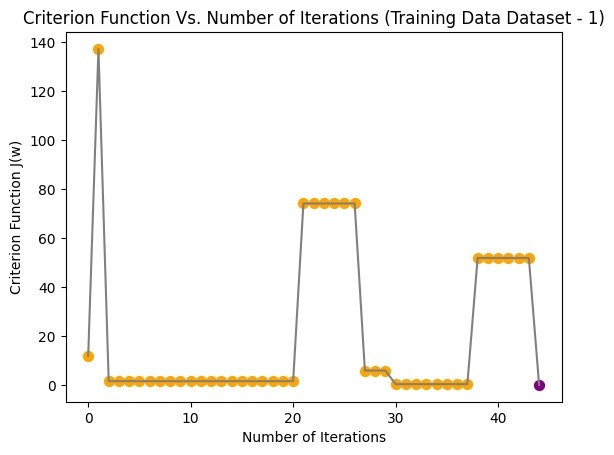

In [10]:
if n_epochs <= 10:
    perceptron_1.plotCriterionVsIters(n_iters=n_iters_arr, J_History_iters=J_History_iterations, J_optimum_iters=J_optimum_iterations, datasetName="Training Data Dataset - 1")

else:
    perceptron_1.plotCriterionVsEpochs(n_epochs=n_epochs_arr, J_History_epochs=J_History_epochs, J_optimum_epochs=J_optimum_epochs, datasetName="Training Data Dataset - 1")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

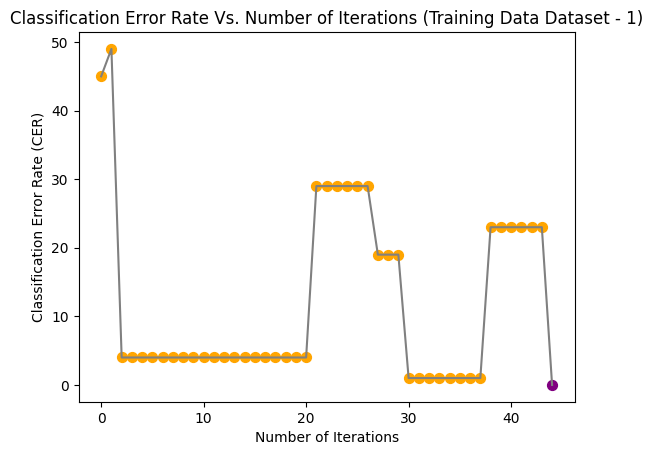

In [11]:
if n_epochs <= 10:
    perceptron_1.plotCERVsIters(n_iters=n_iters_arr, cer_History_iters=cer_History_iterations, cer_optimum_iters=cer_optimum_iterations, datasetName="Training Data Dataset - 1")

else:
    perceptron_1.plotCriterionVsEpochs(n_epochs=n_epochs_arr, cer_History_epochs=cer_History_epochs, cer_optimum_epochs=cer_optimum_epochs, datasetName="Training Data Dataset - 1")

### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [12]:
Y_hat_training_1 = perceptron_1.predict(X=X_train_augmented, w_optimum=w_optimum_epochs)
cer_training_1 = perceptron_1.calculateCER(T=T_train_changed, Y_hat=Y_hat_training_1, n=n_train)

### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.

In [13]:
n_test, X_test, T_test = perceptron_1.generateTestData(test_data=test_data_1)

X_test_augmented = perceptron_1.augmentData(X=X_test, n=n_test)
print(f"Shape of Augmented X_train: {X_train_augmented.shape}")

T_test_changed = perceptron_1.changeLabels(T = T_test)

X_test_shuffled, T_test_shuffled = perceptron_1.shuffleData(X=X_test_augmented, T=T_test_changed.reshape(n_test, 1))

w_vector = perceptron_1.initializeWeights(0.1)

TypeError: only integer scalar arrays can be converted to a scalar index

In [14]:
X_test

100